https://www.youtube.com/watch?v=VMj-3S1tku0

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.000001
x = 2/3
(f(x+h) - f(x)) / h # gives the slope of the tangent line at x

In [ ]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

In [ ]:
# checking derivate of d with respect to a, b, c
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h # the slope of d with respect to b (gives a as slope)
d2 = a*b + c

print('d1:', d1)
print('d2:', d2)
print('slope:', (d2 - d1) / h)

In [136]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children) # set of children, used for backpropagation
        self._op = _op
        self.label = label

    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad # gradient of self is 1 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward
        return out # feed self and other as children (gets stored in _prev)
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad # gradient of self is other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad # gradient of self is (1 - t**2) * out.grad

        out._backward = _backward

        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L' # the output of the network (the loss function)
d

Value(data=4.0)

In [133]:
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout


def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_graph(root):
  G = nx.DiGraph()
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    label = n.label if hasattr(n, 'label') else 'No Label'
    G.add_node(uid, label = "{ %s | data %.4f | grad %.4f }" % (label, n.data, n.grad))
    if n._op:
      G.add_node(uid + n._op, label = n._op)
      G.add_edge(uid + n._op, uid)

  for n1, n2 in edges:
    G.add_edge(str(id(n1)), str(id(n2)) + n2._op)

  # Use pygraphviz to create a left-to-right layout
  A = nx.nx_agraph.to_agraph(G)
  A.layout(prog='dot', args='-Grankdir=LR')
  pos = graphviz_layout(G, prog='dot')

  labels = nx.get_node_attributes(G, 'label')

  plt.figure(figsize=(12, 8))  # You can adjust the size as needed
  nx.draw(G, pos, labels=labels, with_labels=True, node_size=500, arrowsize=5, arrowstyle='->')
  plt.show()

In [ ]:
draw_graph(L)

L = d * f

dL/dd = f (this is the derivative of L with respect to d, it is f because f is the only term that depends on d and the derivative of d is 1)

(f(x+h) - f(x))/h  (this is the definition of the derivative)

((d+h)*f - d*f)/h (this is the derivative of L with respect to d)

(d*f + h*f - d*f)/h (simplify)

(h*f)/h (cancel out the d*f)

f (simplify)

dL / dc (we need to know how L changes with respect to c) (we can use the chain rule)

d = c + e

(f(x+h) - f(x))/h (this is the definition of the derivative)

((c+h + e) - (c + e))/h

(c + h + e - c - e) / h

(h) / h

1

dd / dc = 1 (this is the derivative of d with respect to c)
dd / de = 1 (this is the derivative of d with respect to e)
d = c + e

WANT:
dL / dc = (dL / dd) * (dd / dc) (this is the chain rule!)

KNOW:
dL / dd = f = -2
dd / dc = 1

dL / de = -2

e = a * b

de / da? = b = -3.0

dL / da = (dL/de) * (de/da) (this is the chain rule!)

MANUAL BACKPROP SIMPLE

In [ ]:
a.grad = (-2 * -3.0)
b.grad = (-2 * 2.0)

In [ ]:
c.grad = -2.0
e.grad = -2.0

In [ ]:
L.grad = 1.0 # start backpropagation

In [ ]:
f.grad = 4.0
d.grad = -2.0

In [ ]:
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a*b
d = e + c
L = d*f

print(L.data)

In [ ]:
def lol():

    h = 0.001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    a.data += h
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h) # the derivative of L with respect to a

lol()

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid() # tanh function plotted

In [137]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b (the neuron activation function)
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

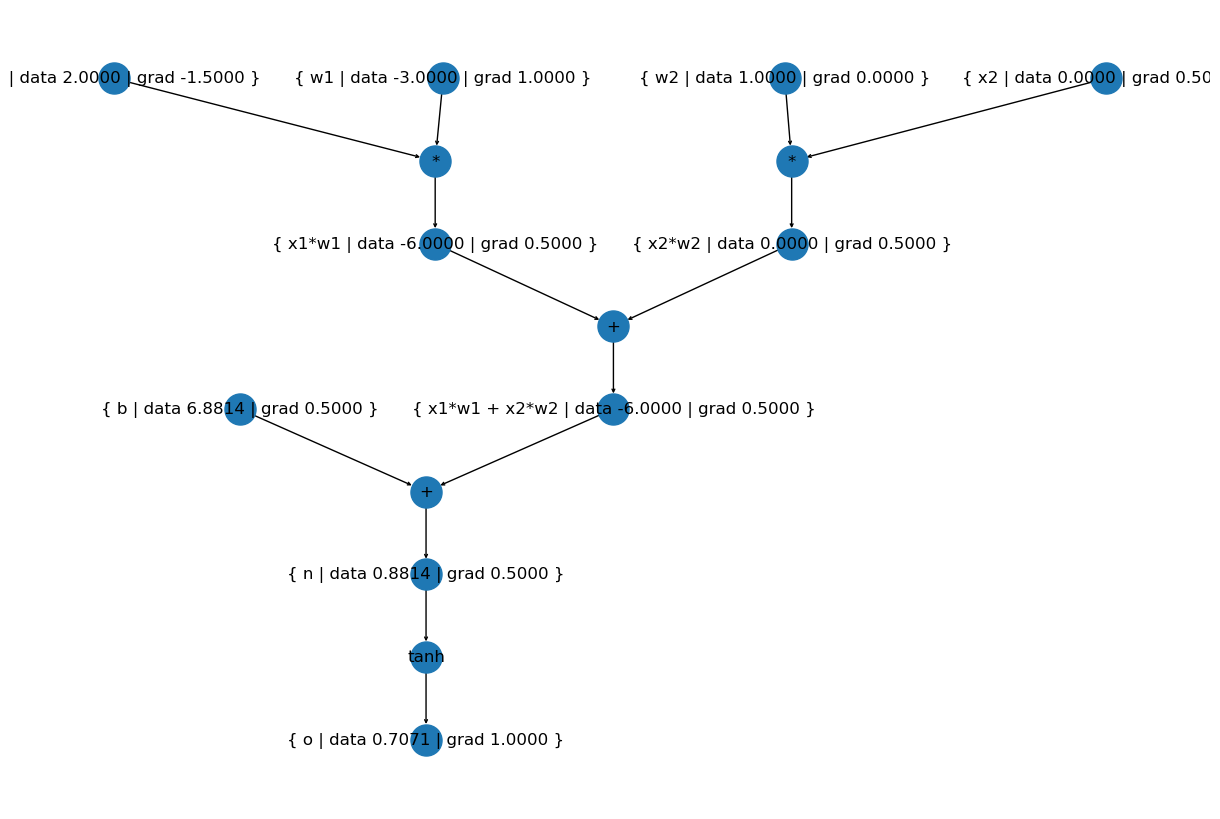

In [149]:
draw_graph(o)

In [139]:
o.grad = 1.0 # start backpropagation

In [140]:
o._backward()

In [142]:
n._backward()

In [144]:
b._backward()

In [146]:
x1w1x2w2._backward()

In [148]:
x2w2._backward()
x1w1._backward()

MANUAL BACKPROP NODE

In [129]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [127]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [124]:
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
# these are all 0.5 since a plus operation splits the gradient in half and sends it to both children

In [123]:
n.grad = 0.5

In [122]:
o.grad = 1.0 # 1 is do/dn (the derivative of the output with respect to the neuron activation function)

In [121]:
1 - o.data**2

0.4999999999999999

In [ ]:
# o = tanh(n)
# do/dn = 1 - tanh(n)**2 = 1 - o**2 (derivative of tanh)